Importe de todas las librerías necesarias

In [3]:
import random
import numpy as NumPy
import tensorflow as TensorFlow
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

Establecemos una semilla

In [4]:
seed_value = 31
random.seed(seed_value)                             # Semilla para Python
NumPy.random.seed(seed_value)                       # Semilla para NumPy
TensorFlow.random.set_seed(seed_value)              # Semilla para TensorFlow/Keras

Función anexa que nos servirá para mostrar gráficas

In [5]:
def generatePlot(history):
    # Extracción de datos
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Creación del gráfico de accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training')
    plt.plot(epochs, val_acc, 'r', label='Validation')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Creación del gráfico de loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training')
    plt.plot(epochs, val_loss, 'r', label='Validation')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

### **Configuración de los parámetros iniciales**

Cada lote será de 16 fotos

Imagenes 150x150

Y se utilizará un 20% para el conjunto de validación

In [6]:
dataset_path = "C:/Users/victo/Desktop/Monkeys"
batch_size = 16
image_size = (150, 150)
rescale_factor = 1. / 255
validation_split_value = 0.2

### **Configuración de los conjuntos de Entrenamiento y Validación**

In [7]:
data_generator = ImageDataGenerator(
    rescale=rescale_factor,
    validation_split=validation_split_value
)

train_generator = data_generator.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = data_generator.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 557 images belonging to 5 classes.
Found 137 images belonging to 5 classes.


Visualización de las imagenes

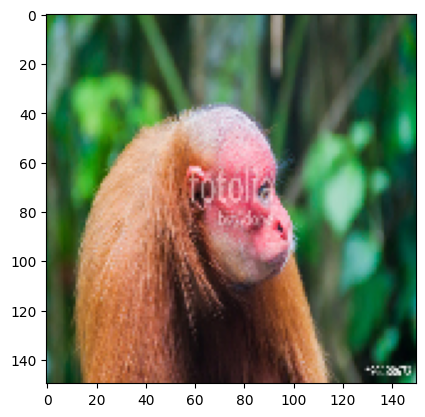

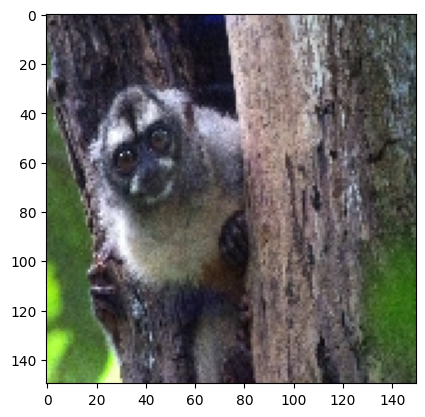

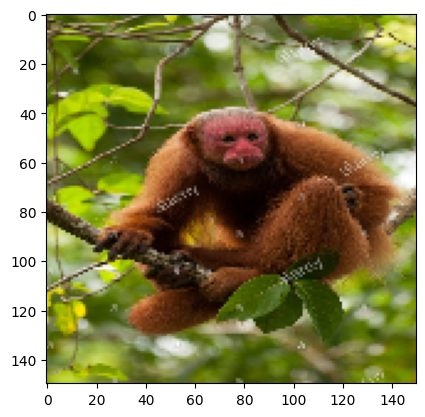

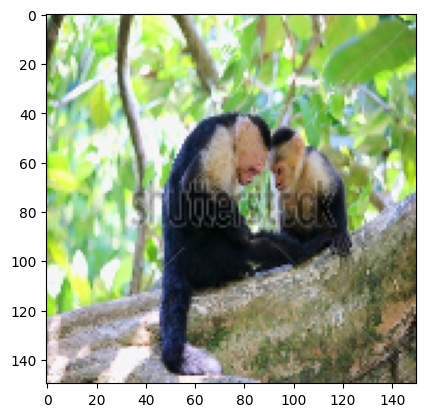

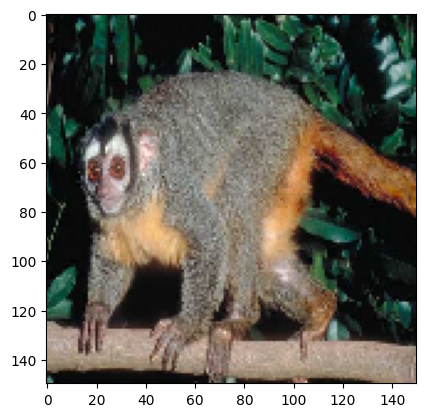

In [8]:
x_batch, y_batch = next(train_generator)
for i in range (0, 5):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

Configurar Early Stopping: A partir de 8 épocas sin mejora significativa de val_loss se detiene el entrenamiento.

In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience=8)

### **Configuración de los conjuntos de Entrenamiento y Validación**

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Compilación del modelo y Entrenamiento

In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

epochs = 30

training = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[ early_stopping ]
)

Epoch 1/30
35/35 [==============================] - 26s 721ms/step - loss: 1.6068 - accuracy: 0.2065 - val_loss: 1.5359 - val_accuracy: 0.2044
Epoch 2/30
35/35 [==============================] - 16s 456ms/step - loss: 1.5213 - accuracy: 0.3196 - val_loss: 1.4971 - val_accuracy: 0.4015
Epoch 3/30
35/35 [==============================] - 17s 488ms/step - loss: 1.3992 - accuracy: 0.3716 - val_loss: 1.1802 - val_accuracy: 0.5036
Epoch 4/30
35/35 [==============================] - 17s 485ms/step - loss: 1.2508 - accuracy: 0.4811 - val_loss: 1.0744 - val_accuracy: 0.5839
Epoch 5/30
35/35 [==============================] - 17s 484ms/step - loss: 1.1409 - accuracy: 0.5619 - val_loss: 0.8671 - val_accuracy: 0.6715
Epoch 6/30
35/35 [==============================] - 20s 561ms/step - loss: 0.9810 - accuracy: 0.6409 - val_loss: 0.6947 - val_accuracy: 0.7518
Epoch 7/30
35/35 [==============================] - 18s 509ms/step - loss: 0.7892 - accuracy: 0.6948 - val_loss: 0.6814 - val_accuracy: 0.7080

Visualización de los valores de val_accuracy y val_loss con respecto a acuraccy y loss

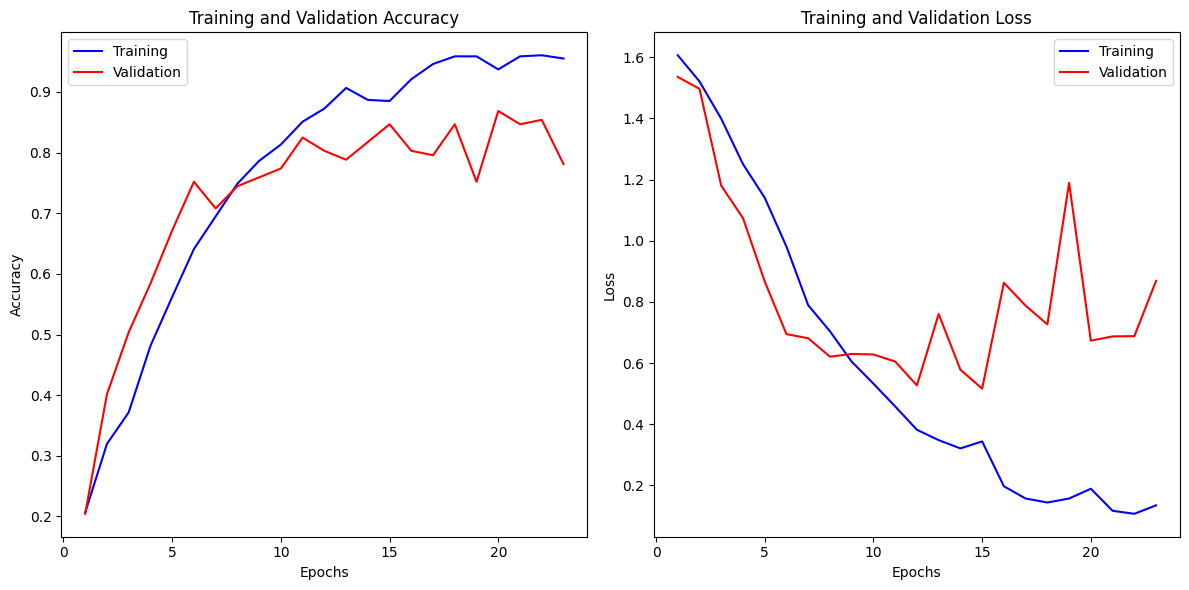

Test loss: 0.8691809177398682
Test accuracy: 0.7810218930244446


In [12]:
generatePlot(training)

score = model.evaluate(validation_generator, steps=50, verbose=0)  #'steps' es el número de lotes a evaluar

print('Test loss:', score[0])
print('Test accuracy:', score[1])